# Project: Customer Churn Analysis
Autor: Miguel Vásquez  
Date: Agosto 2025  

# 1. Introduction

In this project, we analyze the percentage of customers who end their subscription with a company — a phenomenon known as churn.
The main objective is to detect these customers more effectively before their contracts expire, allowing the business to apply retention strategies in a timely manner.
In particular, we aim to:

- Identify the percentage of customers who cancel vs. those who remain.
- Explore whether the churn rate varies depending on the services contracted.
- Determine which services are the most profitable.

# 2. Importing Libraries

In [1]:
# Data handling
import pandas as pd
import numpy as np
import missingno as msno

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Utilities
import warnings
from IPython.display import display, Markdown

warnings.filterwarnings("ignore")

# Global display settings
sns.set_theme(style="whitegrid", palette="pastel")
plt.figure(figsize=(8,5))
plt.rcParams["figure.figsize"] = (10, 5)


<Figure size 800x500 with 0 Axes>

In [2]:
import kagglehub
path = kagglehub.dataset_download("blastchar/telco-customer-churn")
# Loading dataset
csv_file_path = path + "/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(csv_file_path)
# First 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 3. Data Analysis
In this step, we first review a preview of the dataset.
The most relevant variables for our analysis are:
- Churn -> Indicates whether the customer canceled their contract in the last month.
- Services -> Columns describing which services the customer subscribed to.
- Contract Type -> Includes information about contract renewal, payment method, tenure, monthly charges, and total charges.
- Customer Information -> Gender, age, partner, and dependents.

In [3]:
# Dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# Column names
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [5]:
#Type of values ​​in each column
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

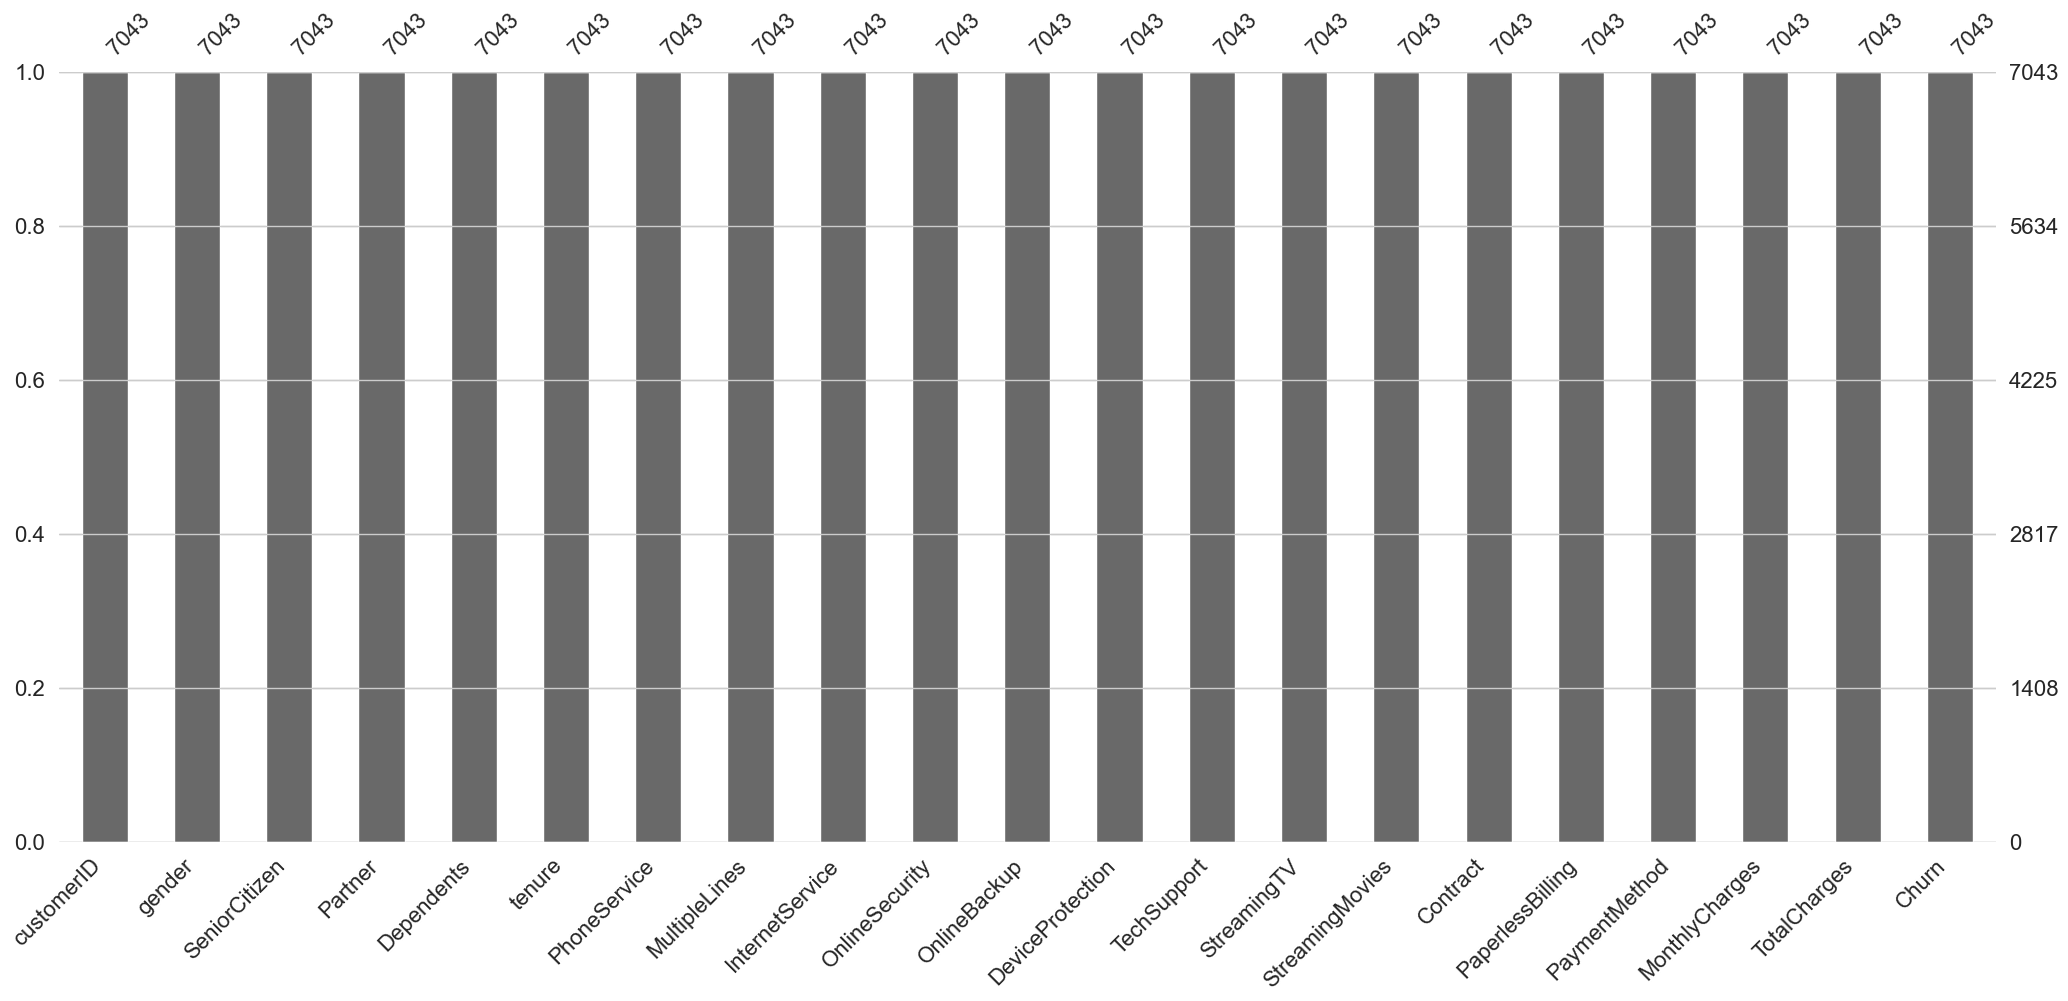

In [6]:
#We visualize the data to find missing values
msno.bar(df);

# 4. Data manipulation

In [7]:
#We start with data cleaning, first the customerID is not useful for analysis and we already have an index
df = df.drop(columns=['customerID'])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Initially, no missing values were detected. However, we noticed that the column `TotalCharges` was of type Object, so we converted it to numeric. This revealed blank values `" "` that were not previously recognized as missing, but were now correctly treated as `NaN`.

In [8]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

We can see that indeed, `" "` was not detected as a missing value, but now it is, which will help with our analysis.

In [9]:
#Rows with null values ​​in 'TotalCharges'
df[df['TotalCharges'].isna()].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [10]:
#We delete rows with null values ​​in 'TotalCharges'
df = df[~df["TotalCharges"].isna()]
#Since we have modified the DataFrame, it is advisable to reset the index
df.reset_index(drop=True, inplace=True)

We also observed that most binary columns contained `0` and `1` values, except for `SeniorCitizen`, which used `"Yes"` and `"No"`. We standardized this column for consistency with the others.

In [11]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
# Function to display the analysis by category
def display_analysis(title: str,df=None,overall_rate=None, category_col: str=None, summary: list=None, recommendations: list=None):
    # Title
    display(Markdown(f"## {title}"))
    
    # Summary
    if summary:
        for s in summary:
            display(Markdown(f"- {s}"))

    # Insights
    if df is not None and category_col:
        # Calculate churn rate by category
        highest = df.iloc[-1]
        lowest = df.iloc[0]
        for _, row in df.iterrows():
            category = row[category_col]
            rate = row['Churn_Rate']
            total = int(row['Total_Customers'])
            
            trend = ""
            if overall_rate is not None:
                trend = "🔴 **HIGH**" if rate > overall_rate else "🟢 **LOW**"
            
            display(Markdown(
                f"- **{category}**  \n"
                f"  • Churn rate: {rate:.1f}% {trend}  \n"
                f"  • Total customers: {total:,}  \n"
                f"  • Difference vs average: {rate - overall_rate:+.1f}%"
                if overall_rate is not None else
                f"- **{category}** — {rate:.1f}% ({total:,} customers)"
            ))
        
        display(Markdown("### 🎯 Key Insights"))
        display(Markdown(
            f"- **Highest Risk**: {highest[category_col]} "
            f"({highest['Churn_Rate']:.1f}%)"
        ))
        display(Markdown(
            f"- **Lowest Risk**: {lowest[category_col]} "
            f"({lowest['Churn_Rate']:.1f}%)"
        ))
        display(Markdown(
            f"- **Difference**: "
            f"{highest['Churn_Rate'] - lowest['Churn_Rate']:.1f} percentage points"
        ))

    # Recommendations
    if recommendations:
        display(Markdown("### 💡 Recommendations"))
        for r in recommendations:
            display(Markdown(f"- {r}"))


In [13]:
display_analysis(
    title="📊 Churn rate",
    summary=[
        f"Total customers analyzed: {len(df):,}",
        f"Overall churn rate: {(df['Churn'] == 'Yes').mean()*100:.1f}%",
        f"Data covers period: 2019–2020"
    ]
)

## 📊 Churn rate

- Total customers analyzed: 7,032

- Overall churn rate: 26.6%

- Data covers period: 2019–2020

# 5. Data Visualization

In [14]:
def plot_donut_subplots(data_list, rows=1, cols=2, title=None, subplot_titles=None, text_size=16):
    fig = make_subplots(
        rows=rows, cols=cols,
        specs=[[{"type": "domain"} for _ in range(cols)] for _ in range(rows)],
        subplot_titles=subplot_titles
    )
    
    for i, data in enumerate(data_list):
        row = i // cols + 1
        col = i % cols + 1

        fig.add_trace(go.Pie(
            labels=data["labels"],
            values=data["values"],
            hole=0.4,
            marker_colors=data["colors"],
            textinfo="percent",
            textposition="inside",
            insidetextorientation="radial",
            textfont=dict(size=text_size),
            name=data.get("name", f"trace_{i}"),
            showlegend=True,
            legendgroup=f"group_{i}"
        ), row, col)

    fig.update_layout(
        title_text=title,
        title_x=0.5,
        title_font_size=18,
        font=dict(size=12),
        legend=dict(
            orientation="v",
            x=1.05, y=1
        )
    )
    return fig


In [15]:
# We will make our first diagram to see the distribution of churn by gender
# Labels
g_labels = df['gender'].value_counts().index
churn_counts = df['Churn'].value_counts()
c_labels = churn_counts.index

plot_donut_subplots(
    data_list=[
        {
            "labels": g_labels,
            "values": df['gender'].value_counts(),
            "name": "Gender",
            "colors": ['#636EFA', '#EF553B'],
        },
        {
            "labels": c_labels,
            "values": churn_counts,
            "name": "Churn",
            "colors": ['#00CC96', '#AB63FA'],
        }
    ],
    rows=1, cols=2,
    title="<b>Gender and Churn Distributions</b>",
    subplot_titles=["<b>Gender</b>", "<b>Churned customers</b>"],
    text_size=18
)



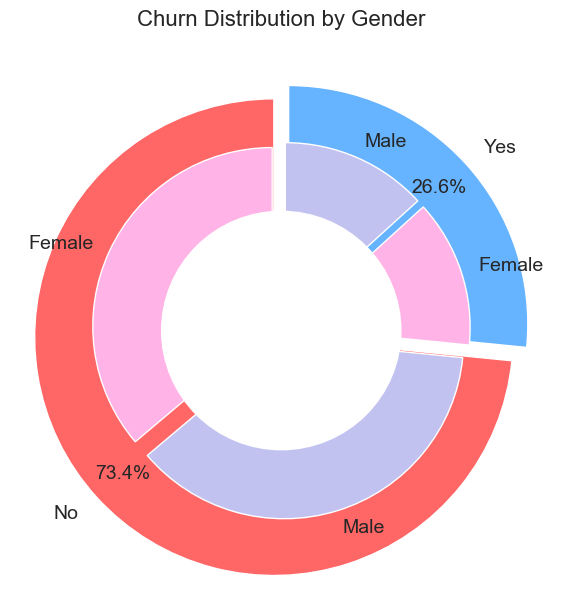

In [16]:
# Since we have a similar distribution, we make a graph to visualize it
# Create counts table
churn_gender_counts = df.groupby(["Churn", "gender"]).size()

# Totals of churn
churn_totals = df["Churn"].value_counts()

# Labels
labels = churn_totals.index
values = churn_totals.values

# Labels and values by gender
labels_gender = churn_gender_counts.index.get_level_values(1)
sizes_gender = churn_gender_counts.values

# Colors
colors = ['#ff6666', '#66b3ff']  # Churn Yes / No
colors_gender = ['#ffb3e6', '#c2c2f0', '#ffb3e6', '#c2c2f0']

# Plot
plt.figure(figsize=(7, 7))
textprops = {"fontsize":14}

# External donut (churn Yes/No)
plt.pie(
    values, labels=labels, autopct='%1.1f%%',
    pctdistance=0.85, colors=colors, startangle=90,
    explode=(0.05,0.05), radius=1.2, textprops=textprops
)

# Internal donut (gender within each churn)
plt.pie(
    sizes_gender, labels=labels_gender, colors=colors_gender,
    startangle=90, radius=0.9, explode=[0.05]*len(sizes_gender),
    textprops=textprops
)

# White circle in the center
centre_circle = plt.Circle((0,0),0.6,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Title
plt.title("Churn Distribution by Gender", fontsize=16, y=1.05)
plt.axis('equal')
plt.show()


In [17]:
# General statistics
overall_churn_rate = (df['Churn'] == 'Yes').mean() * 100

churn_by_gender = df.groupby('gender').agg({
    'Churn': lambda x: (x == 'Yes').mean() * 100,
    'gender': 'count'
}).round(2)
churn_by_gender.columns = ['Churn_Rate', 'Total_Customers']
churn_by_gender = churn_by_gender.reset_index().sort_values('Churn_Rate', ascending=True)

display_analysis(
    title="💳 Gender Analysis",
    df=churn_by_gender,
    overall_rate=overall_churn_rate,
    category_col='gender',
    recommendations=[
        "Consider targeted retention campaigns by gender",
        "Investigate socio-demographic differences in churn"
    ]
)


## 💳 Gender Analysis

- **Male**  
  • Churn rate: 26.2% 🟢 **LOW**  
  • Total customers: 3,549  
  • Difference vs average: -0.4%

- **Female**  
  • Churn rate: 27.0% 🔴 **HIGH**  
  • Total customers: 3,483  
  • Difference vs average: +0.4%

### 🎯 Key Insights

- **Highest Risk**: Female (27.0%)

- **Lowest Risk**: Male (26.2%)

- **Difference**: 0.8 percentage points

### 💡 Recommendations

- Consider targeted retention campaigns by gender

- Investigate socio-demographic differences in churn

In [18]:
def plot_histogram(df, x, color=None, barmode="group", title="", histnorm="percent"):
    fig = px.histogram(
        df, x=x, color=color, barmode=barmode, histnorm=histnorm,
        title=f"<b>{title}</b>"
    )
    
    fig.update_layout(
        width=800, height=550,
        bargap=0.15,
        xaxis_title=f"<b>{x}</b>",
        yaxis_title="<b>Percent</b>" if histnorm=="percent" else "<b>Count</b>",
        title_x=0.5, title_font_size=16,
        font=dict(size=12),
        plot_bgcolor="white", paper_bgcolor="white",
        legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
    )
    
    fig.update_traces(
        texttemplate="%{y:.1f}" + ("%" if histnorm=="percent" else ""),
        textposition="outside",
        marker_line_width=1.5, marker_line_color="white", opacity=0.8
    )
    
    fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor="lightgray",
                     tickfont=dict(size=12, color="black"))
    fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor="lightgray",
                     tickfont=dict(size=12, color="black"))
    
    fig.show()

In [19]:
#Now we will see the distribution of churn by gender
plot_histogram(df, x="Churn", color="Contract",
               title="<b>Distribution of Contract Types by Churn Status</b>")


In [20]:
# We calculate the churn rate by contract type
churn_rate = df.groupby('Contract')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100).reset_index()
churn_rate.columns = ['Contract', 'Churn_Rate']
churn_rate = churn_rate.sort_values('Churn_Rate', ascending=True)

fig = px.bar(churn_rate, x='Churn_Rate', y='Contract', 
              title="<b>Churn Rate by Contract Type</b>",
              orientation='h',
              color='Churn_Rate',
              color_continuous_scale='RdYlGn_r',
              text='Churn_Rate')

fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')

fig.update_layout(
    width=800,
    height=400,
    xaxis_title="<b>Churn Rate (%)</b>",
    yaxis_title="<b>Contract Type</b>",
    title_x=0.5,
    title_font_size=16,
    font=dict(size=12),
    plot_bgcolor='white',
    paper_bgcolor='white',
    showlegend=False,
    xaxis=dict(range=[0, max(churn_rate['Churn_Rate']) * 1.1])
)

fig.show()


In [21]:
churn_by_contract = df.groupby('Contract').agg({
    'Churn': lambda x: (x == 'Yes').mean() * 100,
    'Contract': 'count'
}).round(2)
churn_by_contract.columns = ['Churn_Rate', 'Total_Customers']
churn_by_contract = churn_by_contract.reset_index().sort_values('Churn_Rate', ascending=True)

display_analysis(
    title="💳 Contract Analysis",
    df=churn_by_contract,
    overall_rate=overall_churn_rate,
    category_col='Contract',
    recommendations=[
        "Focus on retaining customers with high churn contracts",
        "Analyze benefits of promoting long-term contracts",
        "Investigate specific factors leading to churn in each type"
    ]
)

## 💳 Contract Analysis

- **Two year**  
  • Churn rate: 2.9% 🟢 **LOW**  
  • Total customers: 1,685  
  • Difference vs average: -23.7%

- **One year**  
  • Churn rate: 11.3% 🟢 **LOW**  
  • Total customers: 1,472  
  • Difference vs average: -15.3%

- **Month-to-month**  
  • Churn rate: 42.7% 🔴 **HIGH**  
  • Total customers: 3,875  
  • Difference vs average: +16.1%

### 🎯 Key Insights

- **Highest Risk**: Month-to-month (42.7%)

- **Lowest Risk**: Two year (2.9%)

- **Difference**: 39.9 percentage points

### 💡 Recommendations

- Focus on retaining customers with high churn contracts

- Analyze benefits of promoting long-term contracts

- Investigate specific factors leading to churn in each type

In [22]:
labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(
    labels=labels, 
    values=values, 
    hole=.4,
    textinfo="percent",
    textposition="inside",
    insidetextorientation="horizontal",
    textfont=dict(size=20),
    marker_colors=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
)])

fig.update_layout(
    title_text="<b>General Distribution of Payment Methods</b>",
    title_x=0.5,
    title_font_size=18,
    width=700,
    height=500,
    font=dict(size=12),
    legend=dict(
        orientation="v",
        x=1.05, y=1
    )
)

fig.show()

In [23]:
# We will make our first diagram to see the churn distribution by payment method
# Labels
retained_payments = df[df['Churn'] == 'No']['PaymentMethod'].value_counts()
rotated_payments = df[df['Churn'] == 'Yes']['PaymentMethod'].value_counts()

plot_donut_subplots(
    data_list=[
        {
            "labels": retained_payments.index,
            "values": retained_payments.values,
            "name": "Retained",
            "colors": ['#636EFA', '#EF553B', '#FFA15A', '#19D3F3'],
            "annotation": "Payment Method"
        },
        {
            "labels": rotated_payments.index,
            "values": rotated_payments.values,
            "name": "Churned",
            "colors": ['#00CC96', '#AB63FA', '#FF6692', '#B6E880'],
            "annotation": "Churned"
        }
    ],
    rows=1, cols=2,
    title="<b>Payment Method Distributions</b>",
    subplot_titles=["<b>Retained customers</b>", "<b>Churned customers</b>"],
    text_size=18
)


In [24]:
churn_by_payment = df.groupby('PaymentMethod').agg({
    'Churn': lambda x: (x == 'Yes').mean() * 100,
    'PaymentMethod': 'count'
}).round(2)
churn_by_payment.columns = ['Churn_Rate', 'Total_Customers']
churn_by_payment = churn_by_payment.reset_index().sort_values('Churn_Rate', ascending=True)
highest_churn = churn_by_payment.iloc[-1]
lowest_churn = churn_by_payment.iloc[0]

display_analysis(
    title="💳 Payment Method Analysis",
    df=churn_by_payment,
    overall_rate=overall_churn_rate,
    category_col='PaymentMethod',
    recommendations=[
        f"Encourage the use of {lowest_churn['PaymentMethod']}",
        f"Investigate issues with {highest_churn['PaymentMethod']}",
        "Consider specific retention programs by payment method",
        "Analyze the ease of use and experience of each method"
    ]
)


## 💳 Payment Method Analysis

- **Credit card (automatic)**  
  • Churn rate: 15.2% 🟢 **LOW**  
  • Total customers: 1,521  
  • Difference vs average: -11.3%

- **Bank transfer (automatic)**  
  • Churn rate: 16.7% 🟢 **LOW**  
  • Total customers: 1,542  
  • Difference vs average: -9.8%

- **Mailed check**  
  • Churn rate: 19.2% 🟢 **LOW**  
  • Total customers: 1,604  
  • Difference vs average: -7.4%

- **Electronic check**  
  • Churn rate: 45.3% 🔴 **HIGH**  
  • Total customers: 2,365  
  • Difference vs average: +18.7%

### 🎯 Key Insights

- **Highest Risk**: Electronic check (45.3%)

- **Lowest Risk**: Credit card (automatic) (15.2%)

- **Difference**: 30.0 percentage points

### 💡 Recommendations

- Encourage the use of Credit card (automatic)

- Investigate issues with Electronic check

- Consider specific retention programs by payment method

- Analyze the ease of use and experience of each method

In [25]:
pastel_palette = px.colors.qualitative.Set3
df_counts = df.groupby(['Churn', 'gender', 'InternetService']).size().reset_index(name='Count')
colors = {'DSL':pastel_palette[4], 'Fiber optic':pastel_palette[3], 'No':pastel_palette[0]}
service_labels = {
    'DSL': 'DSL',
    'Fiber': 'Fiber optic',
    'No': 'No Internet'
}
# Prepare the figure
fig = go.Figure()

for service, group in df_counts.groupby('InternetService'):
    fig.add_trace(go.Bar(
        x=[group['Churn'], group['gender']],
        y=group['Count'],
        name=service_labels.get(service, service),
        marker_color=colors.get(service, '#000000')
    ))

fig.update_layout(
    title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>",
    title_x=0.5,
    barmode='group'
)

fig.show()

In [26]:
# We group by 3 variables
churn_by_group = df.groupby(['gender', 'InternetService']).agg({
    'Churn': lambda x: (x == 'Yes').mean() * 100,
    'PaymentMethod': 'count'
}).round(2)
churn_by_group.columns = ['Churn_Rate', 'Total_Customers']
churn_by_group = churn_by_group.reset_index().sort_values('Churn_Rate', ascending=True)
churn_by_group['InternetService'] = churn_by_group['InternetService'].replace({'No': 'No Internet service'})
churn_by_group['Category'] = churn_by_group['gender'] + " | " + churn_by_group['InternetService']

highest_churn = churn_by_group.iloc[-1]
lowest_churn = churn_by_group.iloc[0]

display_analysis(
    title="💳 Payment Method Analysis",
    df=churn_by_group,
    overall_rate=overall_churn_rate,
    category_col='Category',
    recommendations=[
        f"Encourage the use of {lowest_churn['Category']}",
        f"Investigate issues with {highest_churn['Category']}",
        "Consider specific retention programs by payment method",
        "Analyze the ease of use and experience of each method"
    ]
)


## 💳 Payment Method Analysis

- **Male | No Internet service**  
  • Churn rate: 7.4% 🟢 **LOW**  
  • Total customers: 774  
  • Difference vs average: -19.2%

- **Female | No Internet service**  
  • Churn rate: 7.5% 🟢 **LOW**  
  • Total customers: 746  
  • Difference vs average: -19.1%

- **Female | DSL**  
  • Churn rate: 18.5% 🟢 **LOW**  
  • Total customers: 1,184  
  • Difference vs average: -8.1%

- **Male | DSL**  
  • Churn rate: 19.5% 🟢 **LOW**  
  • Total customers: 1,232  
  • Difference vs average: -7.1%

- **Male | Fiber optic**  
  • Churn rate: 41.0% 🔴 **HIGH**  
  • Total customers: 1,543  
  • Difference vs average: +14.4%

- **Female | Fiber optic**  
  • Churn rate: 42.8% 🔴 **HIGH**  
  • Total customers: 1,553  
  • Difference vs average: +16.2%

### 🎯 Key Insights

- **Highest Risk**: Female | Fiber optic (42.8%)

- **Lowest Risk**: Male | No Internet service (7.4%)

- **Difference**: 35.4 percentage points

### 💡 Recommendations

- Encourage the use of Male | No Internet service

- Investigate issues with Female | Fiber optic

- Consider specific retention programs by payment method

- Analyze the ease of use and experience of each method

In [27]:
# Now we will see the distribution of churn by dependents
plot_histogram(df, x="Churn", color="Dependents",
               title="<b>Distribution of Dependents Types by Churn Status</b>")

In [28]:
# 🔍 CHURN RATE PER DEPENDENTS
churn_by_dependents = df.groupby('Dependents').agg({
    'Churn': lambda x: (x == 'Yes').mean() * 100,
    'Dependents': 'count'
}).round(2)

churn_by_dependents.columns = ['Churn_Rate', 'Total_Customers']
churn_by_dependents = churn_by_dependents.reset_index().sort_values('Churn_Rate', ascending=True)

# Identify high and low risk groups
high_risk = churn_by_dependents[churn_by_dependents['Churn_Rate'] > overall_churn_rate]['Dependents'].tolist()
low_risk = churn_by_dependents[churn_by_dependents['Churn_Rate'] <= overall_churn_rate]['Dependents'].tolist()

display_analysis(
    title="💳 Dependents Analysis",
    df=churn_by_dependents,
    overall_rate=overall_churn_rate,
    category_col='Dependents',
    recommendations=[
        f"Focus on retaining customers in high-risk groups: {', '.join(high_risk)} in Dependents",
        f"Leverage strategies from low-risk groups: {', '.join(low_risk)} in Dependents",
    ]
)


## 💳 Dependents Analysis

- **Yes**  
  • Churn rate: 15.5% 🟢 **LOW**  
  • Total customers: 2,099  
  • Difference vs average: -11.0%

- **No**  
  • Churn rate: 31.3% 🔴 **HIGH**  
  • Total customers: 4,933  
  • Difference vs average: +4.7%

### 🎯 Key Insights

- **Highest Risk**: No (31.3%)

- **Lowest Risk**: Yes (15.5%)

- **Difference**: 15.8 percentage points

### 💡 Recommendations

- Focus on retaining customers in high-risk groups: No in Dependents

- Leverage strategies from low-risk groups: Yes in Dependents

In [29]:
# Now we will see the distribution of churn by partner
plot_histogram(df, x="Churn", color="Partner",
               title="<b>Distribution of Partner Types by Churn Status</b>")

In [30]:
# 🔍 PARTNER RATE PER PARTNER
churn_by_partner = df.groupby('Partner').agg({
    'Churn': lambda x: (x == 'Yes').mean() * 100,
    'Partner': 'count'
}).round(2)

churn_by_partner.columns = ['Churn_Rate', 'Total_Customers']
churn_by_partner = churn_by_partner.reset_index().sort_values('Churn_Rate', ascending=True)

# Identify high and low risk groups
high_risk = churn_by_partner[churn_by_partner['Churn_Rate'] > overall_churn_rate]['Partner'].tolist()
low_risk = churn_by_partner[churn_by_partner['Churn_Rate'] <= overall_churn_rate]['Partner'].tolist()

display_analysis(
    title="💳 Partner Analysis",
    df=churn_by_partner,
    overall_rate=overall_churn_rate,
    category_col='Partner',
    recommendations=[
        f"Offer loyalty rewards or targeted incentives for high-risk groups: {', '.join(map(str, high_risk))}",
        f"Learn from low-risk groups ({', '.join(map(str, low_risk))}) to design broader retention strategies",
    ]
)

## 💳 Partner Analysis

- **Yes**  
  • Churn rate: 19.7% 🟢 **LOW**  
  • Total customers: 3,393  
  • Difference vs average: -6.9%

- **No**  
  • Churn rate: 33.0% 🔴 **HIGH**  
  • Total customers: 3,639  
  • Difference vs average: +6.4%

### 🎯 Key Insights

- **Highest Risk**: No (33.0%)

- **Lowest Risk**: Yes (19.7%)

- **Difference**: 13.3 percentage points

### 💡 Recommendations

- Offer loyalty rewards or targeted incentives for high-risk groups: No

- Learn from low-risk groups (Yes) to design broader retention strategies

In [31]:
# Now we will see the distribution of churn according to whether it is a senior citizen
plot_histogram(df, x="Churn", color="SeniorCitizen",
               title="<b>Distribution of Senior Citizens by Churn Status</b>")

In [32]:
# 🔍 PARTNER RATE PER SENIORCITIZEN
churn_by_seniorC = df.groupby('SeniorCitizen').agg({
    'Churn': lambda x: (x == 'Yes').mean() * 100,
    'SeniorCitizen': 'count'
}).round(2)

churn_by_seniorC.columns = ['Churn_Rate', 'Total_Customers']
churn_by_seniorC = churn_by_seniorC.reset_index().sort_values('Churn_Rate', ascending=True)

# Identify high and low risk groups
high_risk = churn_by_seniorC[churn_by_seniorC['Churn_Rate'] > overall_churn_rate]['SeniorCitizen'].tolist()
low_risk = churn_by_seniorC[churn_by_seniorC['Churn_Rate'] <= overall_churn_rate]['SeniorCitizen'].tolist()

display_analysis(
    title="💳 Senior Citizen Analysis",
    df=churn_by_seniorC,
    overall_rate=overall_churn_rate,
    category_col='SeniorCitizen',
    recommendations=[
        f"Offer loyalty rewards or special incentives for high-risk groups: {', '.join(high_risk)} in Senior Citizen",
        f"Learn from low-risk groups ({', '.join(low_risk)}) to design broader retention strategies",
    ]
)

## 💳 Senior Citizen Analysis

- **No**  
  • Churn rate: 23.6% 🟢 **LOW**  
  • Total customers: 5,890  
  • Difference vs average: -2.9%

- **Yes**  
  • Churn rate: 41.7% 🔴 **HIGH**  
  • Total customers: 1,142  
  • Difference vs average: +15.1%

### 🎯 Key Insights

- **Highest Risk**: Yes (41.7%)

- **Lowest Risk**: No (23.6%)

- **Difference**: 18.0 percentage points

### 💡 Recommendations

- Offer loyalty rewards or special incentives for high-risk groups: Yes in Senior Citizen

- Learn from low-risk groups (No) to design broader retention strategies

In [33]:
# Now we will see the distribution of churn according to whether it has online security
plot_histogram(df, x="Churn", color="OnlineSecurity",
               title="<b>Distribution of Online Security by Churn Status</b>")

In [34]:
# 🔍 PARTNER RATE PER ONLINESECURITY
churn_by_online_security = df.groupby('OnlineSecurity').agg({
    'Churn': lambda x: (x == 'Yes').mean() * 100,
    'OnlineSecurity': 'count'
}).round(2)

churn_by_online_security.columns = ['Churn_Rate', 'Total_Customers']
churn_by_online_security = churn_by_online_security.reset_index().sort_values('Churn_Rate', ascending=True)

# Identify high and low risk groups
high_risk = churn_by_online_security[churn_by_online_security['Churn_Rate'] > overall_churn_rate]['OnlineSecurity'].tolist()
low_risk = churn_by_online_security[churn_by_online_security['Churn_Rate'] <= overall_churn_rate]['OnlineSecurity'].tolist()

display_analysis(
    title="💳 Online Security Analysis",
    df=churn_by_online_security,
    overall_rate=overall_churn_rate,
    category_col='OnlineSecurity',
    recommendations=[
        f"Offer bundled security packages or discounts to high-risk groups: {', '.join(map(str, high_risk))}",
        "Consider communicating the benefits of Online Security to increase perceived value.",
        f"Leverage strategies from low-risk groups ({', '.join(map(str, low_risk))}) to retain customers.",
        "Consider communicating the benefits of Online Security to increase perceived value.",
    ]
)

## 💳 Online Security Analysis

- **No internet service**  
  • Churn rate: 7.4% 🟢 **LOW**  
  • Total customers: 1,520  
  • Difference vs average: -19.1%

- **Yes**  
  • Churn rate: 14.6% 🟢 **LOW**  
  • Total customers: 2,015  
  • Difference vs average: -11.9%

- **No**  
  • Churn rate: 41.8% 🔴 **HIGH**  
  • Total customers: 3,497  
  • Difference vs average: +15.2%

### 🎯 Key Insights

- **Highest Risk**: No (41.8%)

- **Lowest Risk**: No internet service (7.4%)

- **Difference**: 34.4 percentage points

### 💡 Recommendations

- Offer bundled security packages or discounts to high-risk groups: No

- Consider communicating the benefits of Online Security to increase perceived value.

- Leverage strategies from low-risk groups (No internet service, Yes) to retain customers.

- Consider communicating the benefits of Online Security to increase perceived value.

In [35]:
# Now we will see the distribution of churn depending on whether you have electronic invoicing
plot_histogram(df, x="Churn", color="PaperlessBilling",
               title="<b>Distribution of Paperless Billing by Churn Status</b>")

In [36]:
# 🔍 PARTNER RATE PER PAPERLESSBILLING
churn_by_paperless = df.groupby('PaperlessBilling').agg({
    'Churn': lambda x: (x == 'Yes').mean() * 100,
    'PaperlessBilling': 'count'
}).round(2)

churn_by_paperless.columns = ['Churn_Rate', 'Total_Customers']
churn_by_paperless = churn_by_paperless.reset_index().sort_values('Churn_Rate', ascending=True)
# Identify high and low risk groups
high_risk = churn_by_paperless[churn_by_paperless['Churn_Rate'] > overall_churn_rate]['PaperlessBilling'].tolist()
low_risk = churn_by_paperless[churn_by_paperless['Churn_Rate'] <= overall_churn_rate]['PaperlessBilling'].tolist()

display_analysis(
    title="💳 Paperless Billing Analysis",
    df=churn_by_paperless,
    overall_rate=overall_churn_rate,
    category_col='PaperlessBilling',
    recommendations=[
        f"Provide clear guidance and support for high-risk groups ({', '.join(high_risk)}): help them adopt Paperless Billing easily, offer tutorials or reminders, and consider small incentives if needed.",
        f"Leverage insights from low-risk groups ({', '.join(low_risk)}): understand why they prefer Paperless Billing and replicate best practices, promoting convenience and sustainability to others."
    ]
)

## 💳 Paperless Billing Analysis

- **No**  
  • Churn rate: 16.4% 🟢 **LOW**  
  • Total customers: 2,864  
  • Difference vs average: -10.2%

- **Yes**  
  • Churn rate: 33.6% 🔴 **HIGH**  
  • Total customers: 4,168  
  • Difference vs average: +7.0%

### 🎯 Key Insights

- **Highest Risk**: Yes (33.6%)

- **Lowest Risk**: No (16.4%)

- **Difference**: 17.2 percentage points

### 💡 Recommendations

- Provide clear guidance and support for high-risk groups (Yes): help them adopt Paperless Billing easily, offer tutorials or reminders, and consider small incentives if needed.

- Leverage insights from low-risk groups (No): understand why they prefer Paperless Billing and replicate best practices, promoting convenience and sustainability to others.

In [37]:
plot_histogram(df, x="Churn", color="TechSupport",
               title="<b>Distribution of Tech Support by Churn Status</b>")

In [38]:
# 🔍 PARTNER RATE PER TECHSUPPORT
churn_by_tech_support = df.groupby('TechSupport').agg({
    'Churn': lambda x: (x == 'Yes').mean() * 100,
    'TechSupport': 'count'
}).round(2)

churn_by_tech_support.columns = ['Churn_Rate', 'Total_Customers']
churn_by_tech_support = churn_by_tech_support.reset_index().sort_values('Churn_Rate', ascending=True)

# Identify high and low risk groups
high_risk = churn_by_tech_support[churn_by_tech_support['Churn_Rate'] > overall_churn_rate]['TechSupport'].tolist()
low_risk = churn_by_tech_support[churn_by_tech_support['Churn_Rate'] <= overall_churn_rate]['TechSupport'].tolist()

display_analysis(
    title="💳 Tech Support Analysis",
    df=churn_by_tech_support,
    overall_rate=overall_churn_rate,
    category_col='TechSupport',
    recommendations=[
        f"Provide proactive troubleshooting, tutorials, and quick-response support for high-risk groups: {', '.join(map(str, high_risk))}",
        f"Identify successful support strategies from low-risk groups ({', '.join(map(str, low_risk))}) and scale them across the customer base"
    ]
)

## 💳 Tech Support Analysis

- **No internet service**  
  • Churn rate: 7.4% 🟢 **LOW**  
  • Total customers: 1,520  
  • Difference vs average: -19.1%

- **Yes**  
  • Churn rate: 15.2% 🟢 **LOW**  
  • Total customers: 2,040  
  • Difference vs average: -11.4%

- **No**  
  • Churn rate: 41.6% 🔴 **HIGH**  
  • Total customers: 3,472  
  • Difference vs average: +15.1%

### 🎯 Key Insights

- **Highest Risk**: No (41.6%)

- **Lowest Risk**: No internet service (7.4%)

- **Difference**: 34.2 percentage points

### 💡 Recommendations

- Provide proactive troubleshooting, tutorials, and quick-response support for high-risk groups: No

- Identify successful support strategies from low-risk groups (No internet service, Yes) and scale them across the customer base

In [39]:
plot_histogram(df, x="Churn", color="PhoneService",
               title="<b>Distribution of Phone Service by Churn Status</b>")


In [40]:
# 🔍 PARTNER RATE PER PHONESERVICE
churn_by_phone_service = df.groupby('PhoneService').agg({
    'Churn': lambda x: (x == 'Yes').mean() * 100,
    'PhoneService': 'count'
}).round(2)

churn_by_phone_service.columns = ['Churn_Rate', 'Total_Customers']
churn_by_phone_service = churn_by_phone_service.reset_index().sort_values('Churn_Rate', ascending=True)

# Identify high and low risk groups
high_risk = churn_by_phone_service[churn_by_phone_service['Churn_Rate'] > overall_churn_rate]['PhoneService'].tolist()
low_risk = churn_by_phone_service[churn_by_phone_service['Churn_Rate'] <= overall_churn_rate]['PhoneService'].tolist()

display_analysis(
    title="💳 Phone Service Analysis",
    df=churn_by_phone_service,
    overall_rate=overall_churn_rate,
    category_col='PhoneService',
    recommendations=[
        f"Enhance call quality, accessibility, and proactive communication for high-risk groups: {', '.join(map(str, high_risk))}",
        f"Learn from low-risk groups ({', '.join(map(str, low_risk))}) to maintain strong service and replicate best practices"
    ]
)

## 💳 Phone Service Analysis

- **No**  
  • Churn rate: 25.0% 🟢 **LOW**  
  • Total customers: 680  
  • Difference vs average: -1.6%

- **Yes**  
  • Churn rate: 26.8% 🔴 **HIGH**  
  • Total customers: 6,352  
  • Difference vs average: +0.2%

### 🎯 Key Insights

- **Highest Risk**: Yes (26.8%)

- **Lowest Risk**: No (25.0%)

- **Difference**: 1.8 percentage points

### 💡 Recommendations

- Enhance call quality, accessibility, and proactive communication for high-risk groups: Yes

- Learn from low-risk groups (No) to maintain strong service and replicate best practices

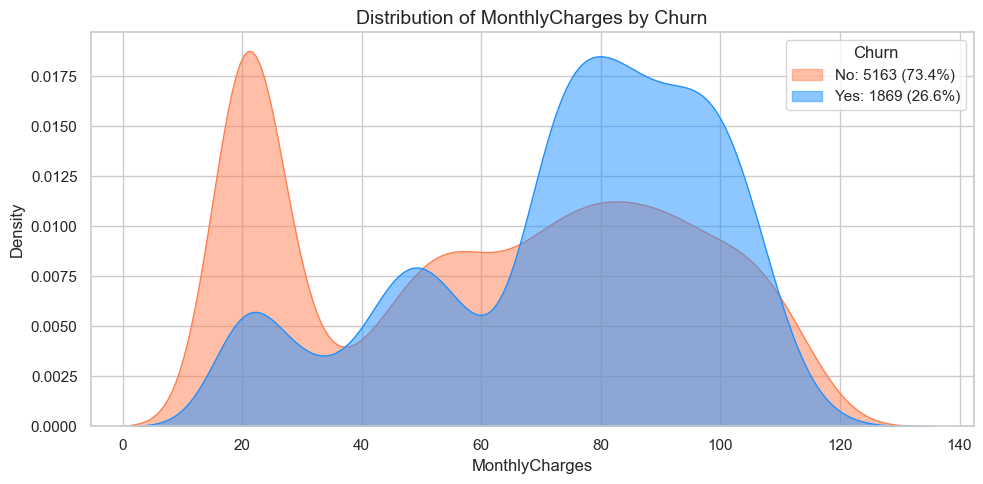

In [41]:
import matplotlib.patches as mpatches
def plot_kde_churn(df, column="MonthlyCharges", target="Churn", colors=None):
    if colors is None:
        colors = {"No": "#FF7F50", "Yes": "#1E90FF"}

    # Filter NaNs and normalize categories
    df_plot = df[[column, target]].dropna().copy()
    df_plot[target] = df_plot[target].astype(str).str.capitalize()  # "yes" -> "Yes"

    # Calculate statistics for the legend
    total = len(df_plot)
    counts = df_plot[target].value_counts()

    # Create figure
    ax = None
    
    for category, color in colors.items():
        if category in df_plot[target].unique():
            ax = sns.kdeplot(
                data=df_plot[df_plot[target]==category],
                x=column,
                fill=True,
                alpha=0.5,
                color=color,
                ax=ax
            )

    # Create custom legend
    patches = [
        mpatches.Patch(color=color, alpha=0.5,
                       label=f"{cat}: {counts.get(cat, 0)} ({counts.get(cat, 0) / total * 100:.1f}%)")
        for cat, color in colors.items()
    ]
    ax.legend(handles=patches, title=target, loc='upper right')

    # Labels and title
    ax.set_xlabel(column)
    ax.set_ylabel("Density")
    ax.set_title(f"Distribution of {column} by {target}", fontsize=14)
    plt.tight_layout()
    plt.show()

# Uso
plot_kde_churn(df)

In [42]:
def display_numeric_analysis(df, column, churn_counts, title="📊 Numeric Analysis", recommendations: dict=None):
    # Title
    display(Markdown(f"## {title}"))
    # Ensure the column is numeric
    df[column] = pd.to_numeric(df[column], errors='coerce')

    # Calculate means
    mean_values = df.groupby('Churn')[column].mean()
    total = len(df)

    display(Markdown("### 🎯 Key Insights"))

    for churn_status in ['No', 'Yes']:
        avg_value = mean_values.get(churn_status, 0)
        trend = "🔴 HIGH" if churn_status == 'Yes' else "🟢 LOW"

        display(Markdown(
            f"- **{churn_status}**  \n"
            f"  • Average {column}: {avg_value:.2f} ({trend})  \n"
            f"  • Total customers: {churn_counts.get(churn_status, 0)}"
            f" ({churn_counts.get(churn_status, 0)/total*100:.1f}%)  \n"
            f"  • Recommendation: {recommendations.get(churn_status, 'N/A') if recommendations else '—'}"
        ))
display_numeric_analysis(
    df, 
    "MonthlyCharges", 
    churn_counts, 
    title="💵 Monthly Charges Analysis", 
    recommendations={
        "No": "Maintain engagement and satisfaction strategies.",
        "Yes": "Offer tailored retention incentives for high-value customers."
    }
)       

## 💵 Monthly Charges Analysis

### 🎯 Key Insights

- **No**  
  • Average MonthlyCharges: 61.31 (🟢 LOW)  
  • Total customers: 5163 (73.4%)  
  • Recommendation: Maintain engagement and satisfaction strategies.

- **Yes**  
  • Average MonthlyCharges: 74.44 (🔴 HIGH)  
  • Total customers: 1869 (26.6%)  
  • Recommendation: Offer tailored retention incentives for high-value customers.

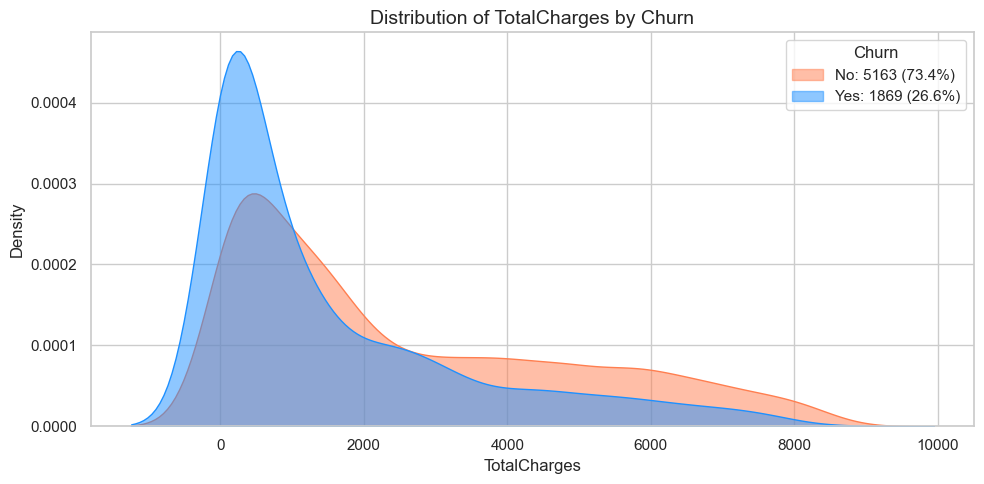

In [43]:
plot_kde_churn(df, column="TotalCharges")

In [44]:
display_numeric_analysis(
    df, 
    "TotalCharges", 
    churn_counts, 
    title="💵 Total Charges Analysis", 
    recommendations={
        "No": "Protect high-value customers by rewarding loyalty (exclusive perks, VIP support, bundled discounts).",
        "Yes": "Explore flexible pricing or introductory offers to increase stickiness among lower-spending customers."
    }
)

## 💵 Total Charges Analysis

### 🎯 Key Insights

- **No**  
  • Average TotalCharges: 2555.34 (🟢 LOW)  
  • Total customers: 5163 (73.4%)  
  • Recommendation: Protect high-value customers by rewarding loyalty (exclusive perks, VIP support, bundled discounts).

- **Yes**  
  • Average TotalCharges: 1531.80 (🔴 HIGH)  
  • Total customers: 1869 (26.6%)  
  • Recommendation: Explore flexible pricing or introductory offers to increase stickiness among lower-spending customers.

In [45]:
fig = px.box(
    df,
    x='Churn',
    y='tenure',
    color='Churn',               # Visually differentiate Churn
    notched=True,                # Add notch for median
    points='all',                # Show individual points (including outliers)
    template='plotly_white',     # Modern and clean style
    title='<b>Tenure vs Churn</b>',
    labels={'tenure':'Tenure (Months)', 'Churn':'Churn Status'}
)

# Add median and mean
fig.update_traces(boxmean='sd')  # Show mean ± standard deviation

# Layout size and style
fig.update_layout(
    width=750,
    height=600,
    title_font=dict(size=22, family='Courier'),
    legend_title_text='Churn',
    yaxis=dict(gridcolor='lightgray'),
    xaxis=dict(gridcolor='lightgray')
)

fig.show()


In [46]:
# Calculate Tenure Statistics by Churn
tenure_stats = df.groupby('Churn')['tenure'].agg(['median', 'mean', 'count']).reset_index()

overall_median = df['tenure'].median()

display(Markdown(f"## 🔍 TENURE ANALYSIS BY CHURN:"))
for _, row in tenure_stats.iterrows():
    churn_status = row['Churn']
    median_tenure = row['median']
    mean_tenure = row['mean']
    total_customers = int(row['count'])

    trend = "🔴 HIGH RISK" if churn_status == 'Yes' else "🟢 LOW RISK"

    display(Markdown(
    f"- **{churn_status}**  \n"
    f"  • Median tenure: {median_tenure:.1f} months  \n"
    f"  • Mean tenure: {mean_tenure:.1f} months  \n"
    f"  • Total customers: {total_customers:,}  \n"
    f"  • Trend vs overall median ({overall_median} months): {trend}  \n"
    ))
display(Markdown(f"### 💡 RECOMMENDATIONS  \n"
                 f"  • Focus retention efforts on customers with short tenure in the Churn = Yes group.  \n"
                 f"  • Reward long-term customers to maintain loyalty and reduce churn.  \n"
                 f"  • Investigate reasons for early churn to design targeted interventions."))


## 🔍 TENURE ANALYSIS BY CHURN:

- **No**  
  • Median tenure: 38.0 months  
  • Mean tenure: 37.7 months  
  • Total customers: 5,163  
  • Trend vs overall median (29.0 months): 🟢 LOW RISK  


- **Yes**  
  • Median tenure: 10.0 months  
  • Mean tenure: 18.0 months  
  • Total customers: 1,869  
  • Trend vs overall median (29.0 months): 🔴 HIGH RISK  


### 💡 RECOMMENDATIONS  
  • Focus retention efforts on customers with short tenure in the Churn = Yes group.  
  • Reward long-term customers to maintain loyalty and reduce churn.  
  • Investigate reasons for early churn to design targeted interventions.

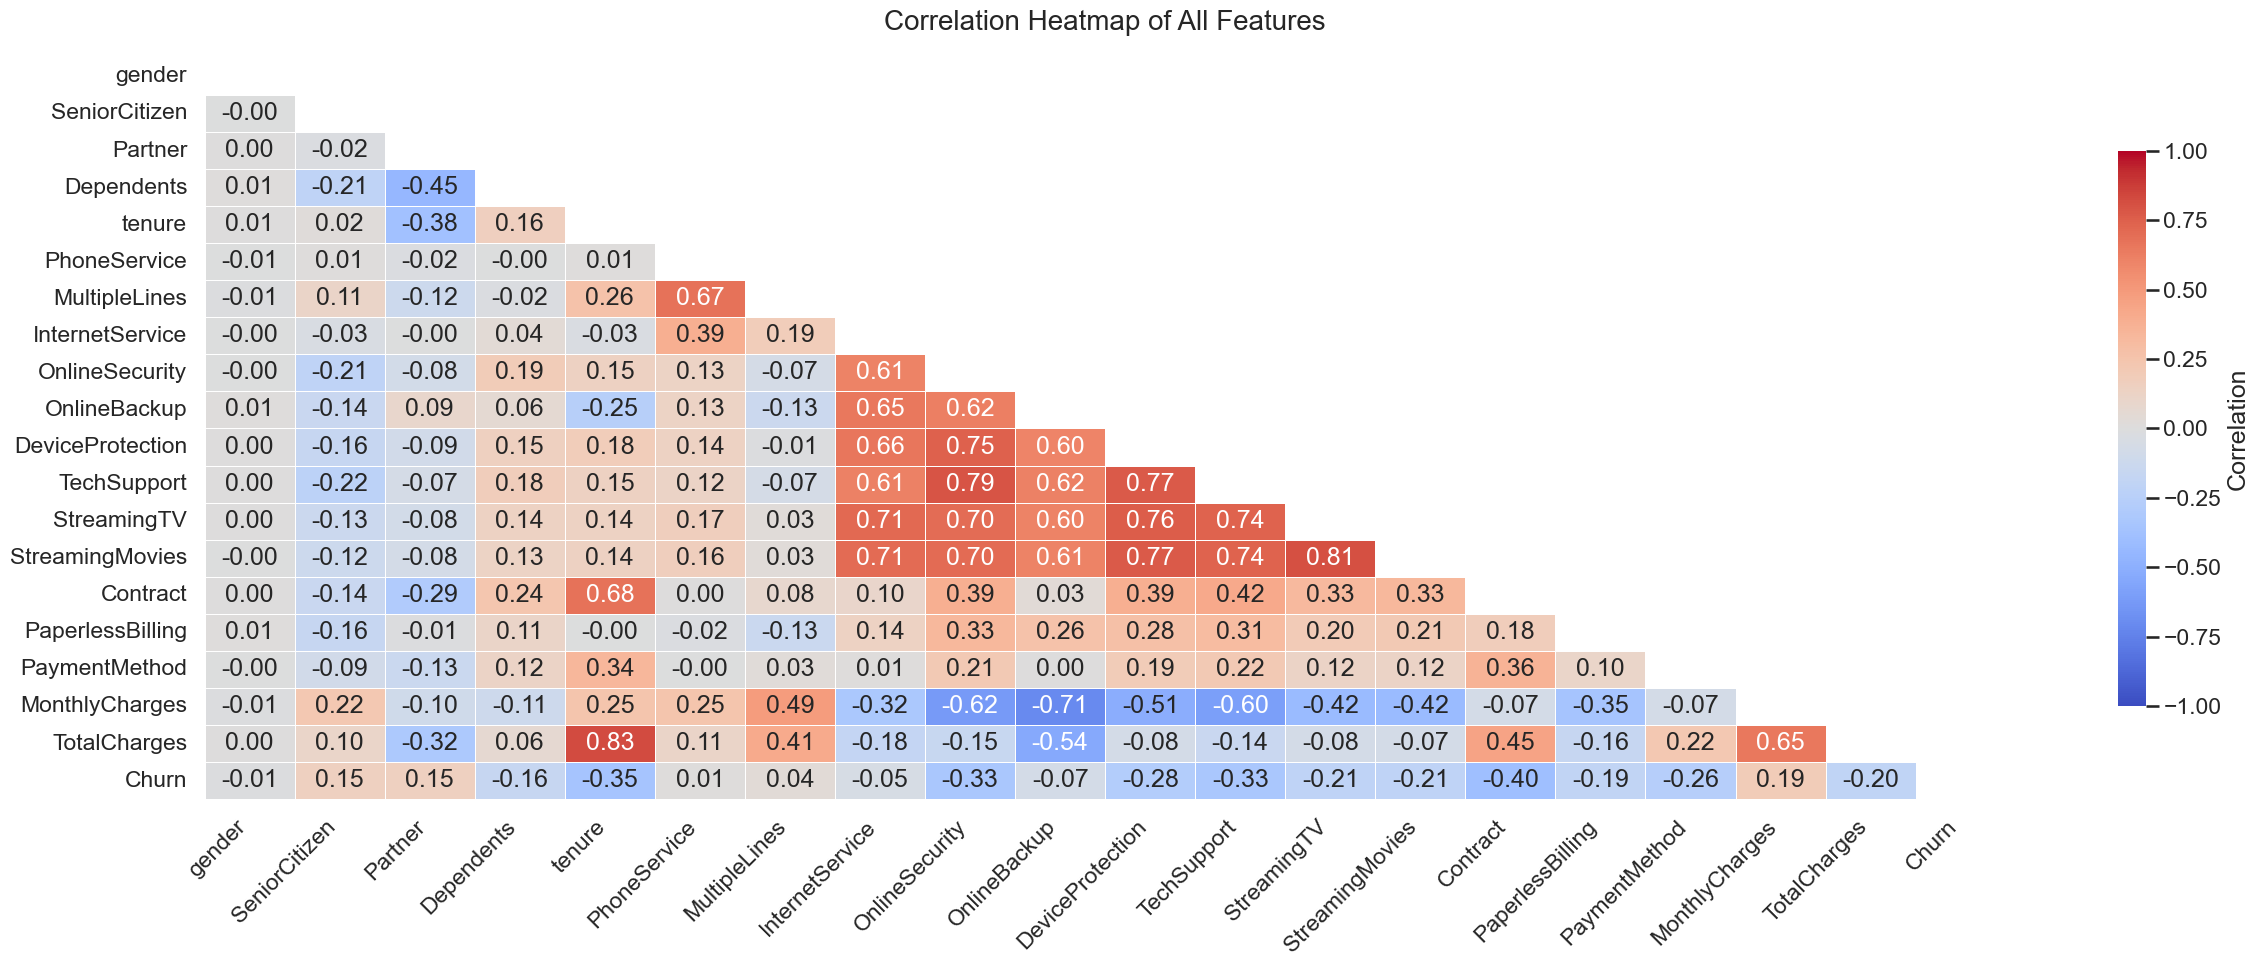

In [47]:
# Factor categorical columns to calculate correlations
df_numeric = df.apply(lambda x: pd.factorize(x)[0] if x.dtype == 'object' else x)

# Correlation matrix
corr = df_numeric.corr()

# Mask to hide the upper half
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot configuration
plt.figure(figsize=(25, 10))
sns.set_style("white")
sns.set_context("talk")  # Larger, more readable font

# Heatmap
ax = sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    cbar_kws={"shrink": 0.75, "label": "Correlation"}
)

# Labels and title
ax.set_title("Correlation Heatmap of All Features", fontsize=20, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [48]:
# We created a table to summarize recommendations by category
def churn_summary_table(df, column, target="Churn", custom_text=None):
    churn_rate = df.groupby(column)[target].apply(lambda x: (x=="Yes").mean()*100).round(1)
    cat_counts = df[column].value_counts()
    
    rows = []
    for cat in cat_counts.index:
        rate = churn_rate.get(cat, 0)
        risk = "🔴 HIGH" if rate > df[target].eq("Yes").mean()*100 else "🟢 LOW"
        rec = custom_text.get(cat, "Focus on retaining customers in this category.") if custom_text else "Focus on retaining customers in this category."
        rows.append((risk, cat, f"{rate:.1f}%", rec))
    
    md = f"### {column}\n\n| Risk Level | Category | Churn Rate | Recommendation |\n|---|---|---|---|\n"
    for r in rows:
        md += f"| {r[0]} | {r[1]} | {r[2]} | {r[3]} |\n"
    
    display(Markdown(md))

# Personalized recommendations by column
custom_recs = {
    "Dependents": {
        "Yes": "Offer family-friendly retention programs.",
        "No": "Leverage their satisfaction to improve marketing."
    },
    "Partner": {
        "Yes": "Encourage existing partners to refer friends.",
        "No": "Target promotions for single customers."
    },
    "SeniorCitizen": {
        1: "Enhance accessibility and support for senior citizens.",
        0: "Maintain excellent service for non-senior customers."
    },
    "OnlineSecurity": {
        "Yes": "Promote security features as value-added service.",
        "No": "Offer affordable security packages to reduce churn.",
        "No internet service": "Upsell online services with security benefits."
    },
    "TechSupport": {
        "Yes": "Highlight tech support benefits to retain customers.",
        "No": "Offer technical support packages for high-risk customers.",
        "No internet service": "Encourage adoption of online services with support."
    },
    "PaperlessBilling": {
        "Yes": "Promote paperless billing as convenience benefit.",
        "No": "Educate about benefits of paperless billing to reduce churn."
    },
    "PhoneService": {
        "Yes": "Provide loyalty incentives for phone service users.",
        "No": "Upsell bundled phone and internet packages to retain."
    }
}

# Columns to analyze
columns_to_analyze = ["Dependents", "Partner", "SeniorCitizen", 
                      "OnlineSecurity", "TechSupport", "PaperlessBilling", "PhoneService"]

# Generate tables with recommendations
for col in columns_to_analyze:
    churn_summary_table(df, col, custom_text=custom_recs.get(col, None))

### Dependents

| Risk Level | Category | Churn Rate | Recommendation |
|---|---|---|---|
| 🔴 HIGH | No | 31.3% | Leverage their satisfaction to improve marketing. |
| 🟢 LOW | Yes | 15.5% | Offer family-friendly retention programs. |


### Partner

| Risk Level | Category | Churn Rate | Recommendation |
|---|---|---|---|
| 🔴 HIGH | No | 33.0% | Target promotions for single customers. |
| 🟢 LOW | Yes | 19.7% | Encourage existing partners to refer friends. |


### SeniorCitizen

| Risk Level | Category | Churn Rate | Recommendation |
|---|---|---|---|
| 🟢 LOW | No | 23.7% | Focus on retaining customers in this category. |
| 🔴 HIGH | Yes | 41.7% | Focus on retaining customers in this category. |


### OnlineSecurity

| Risk Level | Category | Churn Rate | Recommendation |
|---|---|---|---|
| 🔴 HIGH | No | 41.8% | Offer affordable security packages to reduce churn. |
| 🟢 LOW | Yes | 14.6% | Promote security features as value-added service. |
| 🟢 LOW | No internet service | 7.4% | Upsell online services with security benefits. |


### TechSupport

| Risk Level | Category | Churn Rate | Recommendation |
|---|---|---|---|
| 🔴 HIGH | No | 41.6% | Offer technical support packages for high-risk customers. |
| 🟢 LOW | Yes | 15.2% | Highlight tech support benefits to retain customers. |
| 🟢 LOW | No internet service | 7.4% | Encourage adoption of online services with support. |


### PaperlessBilling

| Risk Level | Category | Churn Rate | Recommendation |
|---|---|---|---|
| 🔴 HIGH | Yes | 33.6% | Promote paperless billing as convenience benefit. |
| 🟢 LOW | No | 16.4% | Educate about benefits of paperless billing to reduce churn. |


### PhoneService

| Risk Level | Category | Churn Rate | Recommendation |
|---|---|---|---|
| 🔴 HIGH | Yes | 26.7% | Provide loyalty incentives for phone service users. |
| 🟢 LOW | No | 25.0% | Upsell bundled phone and internet packages to retain. |


# 6. Data Preprocessing
To train the models, categorical variables must be converted into numerical ones.
There are several techniques available, such as `get_dummies()` (One-Hot Encoding) or `LabelEncoder()`, each with its own trade-offs.

Since **none of the categorical variables are ordinal** and only `PaymentMethod` contains more than 2 categories (4 unique values), we applied **One-Hot Encoding** using `get_dummies()`.  
This ensures that categories are represented without implying non-existent hierarchies.

In [49]:
def preprocess_data(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    # Map churn to binary
    if 'Churn' in df.columns:
        df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})  
    # Detect categorical columns (object or category type)
    cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    
    # Apply One-Hot Encoding only to categorical columns
    df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
    
    return df
df_encoded = preprocess_data(df)
df_encoded.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,False,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,34,56.95,1889.50,0,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,2,53.85,108.15,1,True,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,45,42.30,1840.75,0,True,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,2,70.70,151.65,1,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


## 6.1 Correlation
Correlation analysis allows us to identify which features are most strongly associated with the target variable (`Churn`).  
It is important to note that **correlation does not imply causation**, but rather association.

InternetService_Fiber optic             0.307463
PaymentMethod_Electronic check          0.301455
InternetService_No                     -0.227578
TechSupport_No internet service        -0.227578
OnlineSecurity_No internet service     -0.227578
DeviceProtection_No internet service   -0.227578
OnlineBackup_No internet service       -0.227578
StreamingMovies_No internet service    -0.227578
StreamingTV_No internet service        -0.227578
Contract_Two year                      -0.301552
tenure                                 -0.354049
Name: Churn, dtype: float64

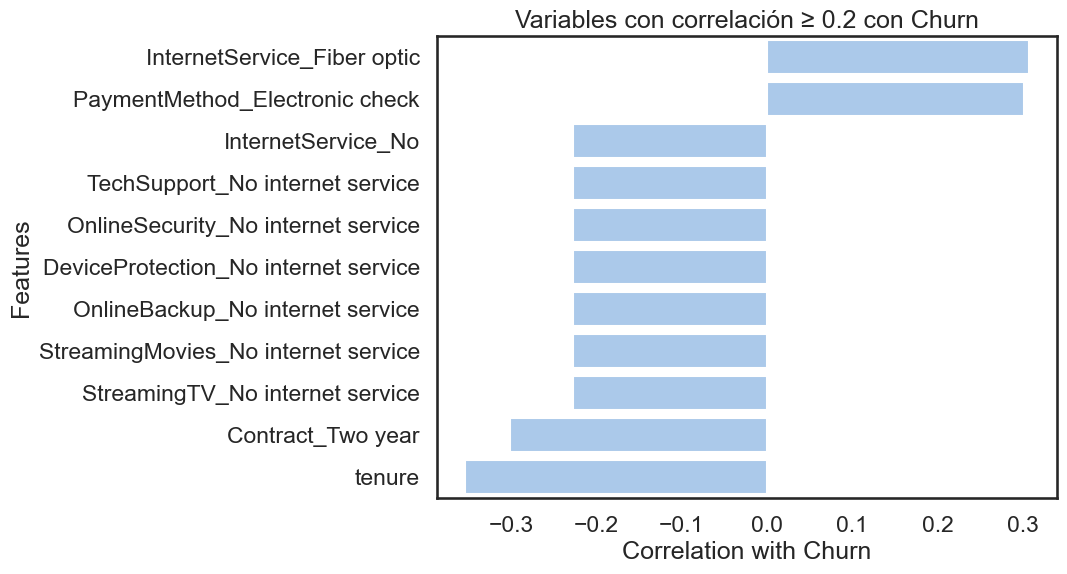

In [50]:
# Calculate correlations with Churn
correlations = df_encoded.corr()['Churn'].drop('Churn')
threshold = 0.2
# Filter variables with significant correlation
significant_corr = correlations[correlations.abs() >= threshold]
# Sort for better visibility
significant_corr = significant_corr.sort_values(ascending=False)
display(significant_corr)

plt.figure(figsize=(8, 6))
sns.barplot(x=significant_corr.values,
            y=significant_corr.index)
plt.title(f"Variables con correlación ≥ {threshold} con Churn")
plt.xlabel("Correlation with Churn")
plt.ylabel("Features")
plt.show()

In [51]:
# We separate the predictor variables in X and the target variable in y.
X = df_encoded.drop(columns = ['Churn'])
y = df_encoded['Churn'].values

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 42, stratify=y)

## 6.2 Validation of X_test Distribution
We verified that the training/test split preserved the original class distribution, ensuring that both samples are **representative and balanced**.

Class distribution (churn rate):
Train: 0.2657
Test:  0.2659

Comparison of numerical means between Train and Test:


,Train Mean,Test Mean,Difference
tenure,32.490248,32.262085,0.228163
MonthlyCharges,64.844210,64.690900,0.153309
TotalCharges,2291.928058,2263.174787,28.753271


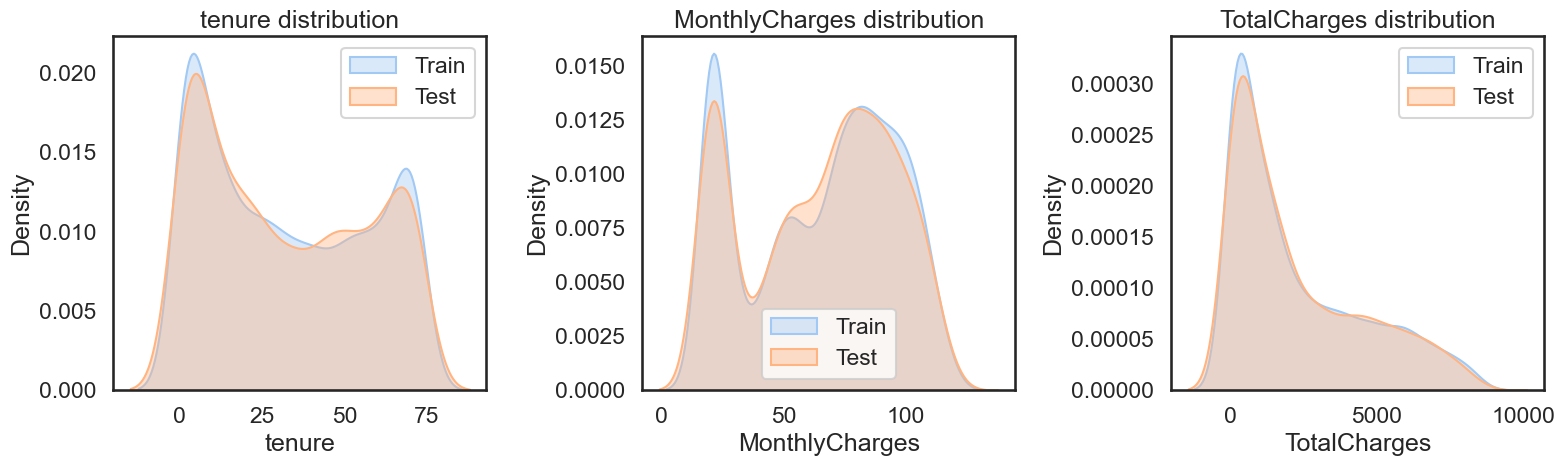

In [53]:
# Churn rate en train/test
train_churn_rate = y_train.mean()
test_churn_rate = y_test.mean()

print("Class distribution (churn rate):")
print(f"Train: {train_churn_rate:.4f}")
print(f"Test:  {test_churn_rate:.4f}\n")

# Comparison of means in numerical variables
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
train_means = X_train[numeric_cols].mean()
test_means = X_test[numeric_cols].mean()
comparison = pd.DataFrame({
    "Train Mean": train_means,
    "Test Mean": test_means,
    "Difference": train_means - test_means
})
print("Comparison of numerical means between Train and Test:")
display(comparison)

# Visualización de distribuciones entre test y train
plt.figure(figsize=(16, 5))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)
    sns.kdeplot(X_train[col], label="Train", fill=True, alpha=0.4)
    sns.kdeplot(X_test[col], label="Test", fill=True, alpha=0.4)
    plt.title(f"{col} distribution")
    plt.xlabel(col)
    plt.legend()

plt.tight_layout()
plt.show()

## 6.3 Feature Scaling
Since we evaluated multiple algorithms, we **standardized numerical variables** using `StandardScaler`.  

- For **scale-sensitive models** (Logistic Regression, SVM, KNN, Neural Networks), scaling is essential to avoid distortions caused by differences in magnitude.
- For **tree-based models** (Decision Tree, Random Forest, XGBoost, LightGBM), scaling is not required, but does not harm performance either.

✅ This ensures fair and comparable conditions across models.

In [54]:
from sklearn.preprocessing import StandardScaler
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Training, Evaluation and Prediction with Machine Learning Models
In this section, we train and evaluate a set of supervised learning models to predict the target variable `Churn`.  

In [55]:
# Functions
# Function to train and evaluate models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
results = []
def train_and_evaluate(model, X_train, X_test, y_train, y_test, model_name="Modelo"):
    # Train
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    display(Markdown(f"### ===== {model_name} =====  \n"
                     f"Accuracy: {round(acc, 4)}  \n"
                     f"Precision: {round(prec, 4)}  \n"
                     f"Recall: {round(rec, 4)}  \n"
                     f"F1-Score: {round(f1, 4)}  \n"
                     f"Classification Report:  \n"
                     f"{classification_report(y_test, y_pred)}"))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["No Churn", "Churn"],
                yticklabels=["No Churn", "Churn"])
    plt.xlabel("Prediction")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    # Save results to global list
    results.append({
        "Modelo": model_name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1
    })
    
    return acc, prec, rec, f1

# Function to display results
def show_results():
    df_results = pd.DataFrame(results)
    df_results = df_results.sort_values(by="F1-Score", ascending=False).reset_index(drop=True)
    display(Markdown("### Model Results\n"
                     f"{df_results.to_markdown(index=False)}"))

## 7.1 Logistic Regression
Logistic Regression is a linear model designed for binary classification. It predicts the probability of class membership using the sigmoid function applied to a linear combination of features.

### ===== Logistic Regression =====  
Accuracy: 0.8071  
Precision: 0.6591  
Recall: 0.5686  
F1-Score: 0.6105  
Classification Report:  
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1549
           1       0.66      0.57      0.61       561

    accuracy                           0.81      2110
   macro avg       0.76      0.73      0.74      2110
weighted avg       0.80      0.81      0.80      2110


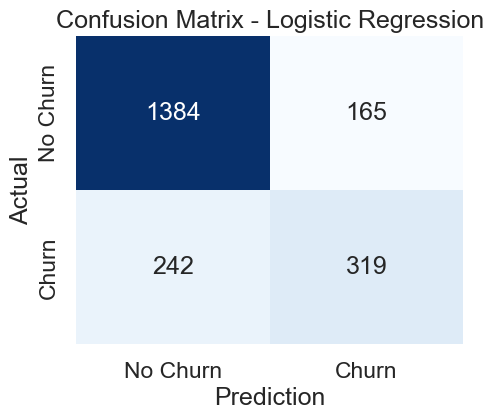

(0.8071090047393364,
 0.6590909090909091,
 0.5686274509803921,
 0.6105263157894737)

In [56]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
train_and_evaluate(log_reg, X_train_scaled, X_test_scaled, y_train, y_test, "Logistic Regression")


## 7.2 K-Nearest Neighbors (KNN)
KNN classifies an observation based on the majority class among its *k* closest neighbors, measured using a distance metric (commonly Euclidean). It is non-parametric and sensitive to scaling.

### ===== KNN =====  
Accuracy: 0.746  
Precision: 0.5225  
Recall: 0.5169  
F1-Score: 0.5197  
Classification Report:  
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1549
           1       0.52      0.52      0.52       561

    accuracy                           0.75      2110
   macro avg       0.67      0.67      0.67      2110
weighted avg       0.75      0.75      0.75      2110


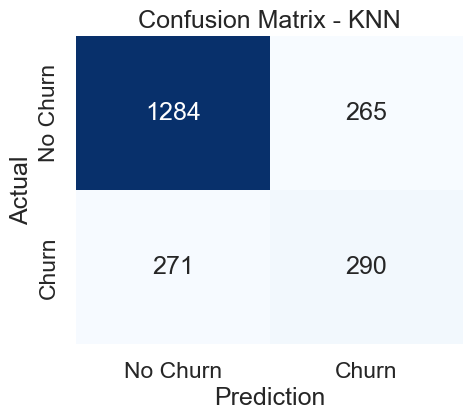

(0.7459715639810427,
 0.5225225225225225,
 0.5169340463458111,
 0.5197132616487455)

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
train_and_evaluate(knn, X_train_scaled, X_test_scaled, y_train, y_test, "KNN")

## 7.3 Support Vector Classifier (SVC)
The SVC finds the hyperplane that maximizes the margin between classes.It can use *kernels* to project data into higher dimensions, enabling the separation of non-linear problems.

### ===== SVM =====  
Accuracy: 0.7943  
Precision: 0.6494  
Recall: 0.492  
F1-Score: 0.5598  
Classification Report:  
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1549
           1       0.65      0.49      0.56       561

    accuracy                           0.79      2110
   macro avg       0.74      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110


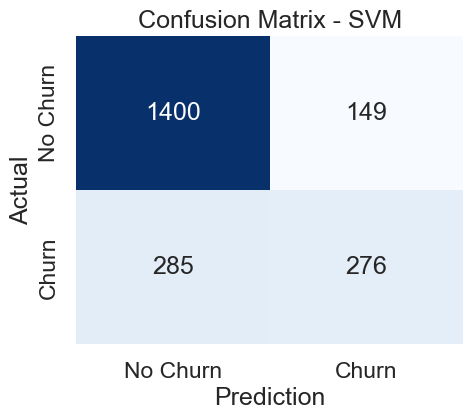

(0.7943127962085308,
 0.6494117647058824,
 0.4919786096256685,
 0.5598377281947262)

In [58]:
from sklearn.svm import SVC
svm = SVC()
train_and_evaluate(svm, X_train_scaled, X_test_scaled, y_train, y_test, "SVM")

## 7.4 Decision Tree Classifier
Decision Trees recursively split the feature space into homogeneous regions based on thresholds.They are highly interpretable, but prone to overfitting if tree depth is not controlled.

### ===== Decision Tree =====  
Accuracy: 0.7123  
Precision: 0.4615  
Recall: 0.492  
F1-Score: 0.4763  
Classification Report:  
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1549
           1       0.46      0.49      0.48       561

    accuracy                           0.71      2110
   macro avg       0.64      0.64      0.64      2110
weighted avg       0.72      0.71      0.72      2110


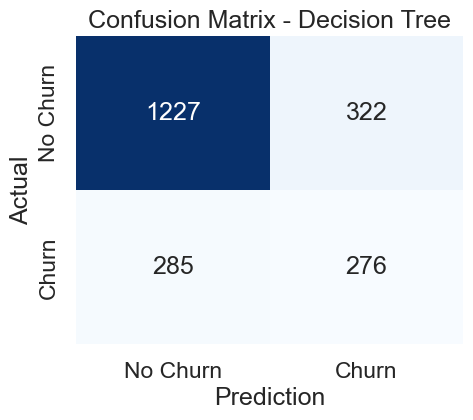

(0.7123222748815166,
 0.46153846153846156,
 0.4919786096256685,
 0.47627264883520276)

In [59]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
train_and_evaluate(dt, X_train_scaled, X_test_scaled, y_train, y_test, "Decision Tree")

## 7.5 Random Forest
Random Forest is an ensemble of decision trees trained on bootstrapped subsets of data and random feature selections. It improves generalization compared to a single tree by reducing variance.

### ===== Random Forest =====  
Accuracy: 0.7853  
Precision: 0.625  
Recall: 0.4813  
F1-Score: 0.5438  
Classification Report:  
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1549
           1       0.62      0.48      0.54       561

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.70      2110
weighted avg       0.77      0.79      0.78      2110


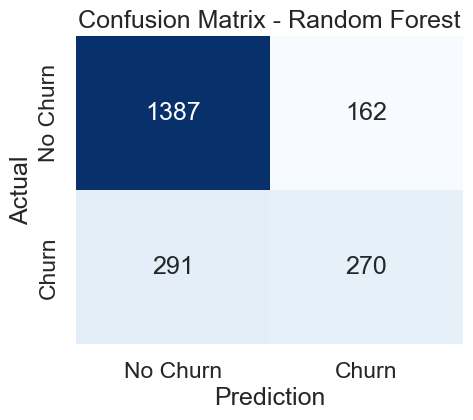

(0.7853080568720379, 0.625, 0.48128342245989303, 0.5438066465256798)

In [60]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
train_and_evaluate(rf, X_train_scaled, X_test_scaled, y_train, y_test, "Random Forest")


## 7.6 AdaBoost Classifier
AdaBoost combines weak classifiers (often shallow trees) into a strong ensemble. It assigns higher weights to previously misclassified observations, focusing on difficult cases.

### ===== AdaBoost =====  
Accuracy: 0.7929  
Precision: 0.6623  
Recall: 0.451  
F1-Score: 0.5366  
Classification Report:  
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1549
           1       0.66      0.45      0.54       561

    accuracy                           0.79      2110
   macro avg       0.74      0.68      0.70      2110
weighted avg       0.78      0.79      0.78      2110


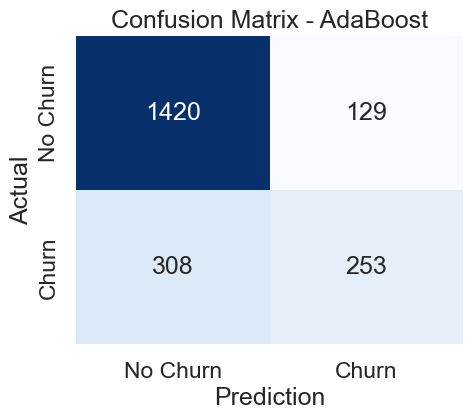

(0.7928909952606635,
 0.662303664921466,
 0.45098039215686275,
 0.5365853658536586)

In [61]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=42)
train_and_evaluate(ada, X_train_scaled, X_test_scaled, y_train, y_test, "AdaBoost")


## 7.7 Gradient Boosting Classifier
Gradient Boosting builds models sequentially, with each one correcting the errors of the previous using gradient descent on the loss function. It often outperforms AdaBoost, but requires more computational resources.

### ===== Gradient Boosting =====  
Accuracy: 0.7929  
Precision: 0.6403  
Recall: 0.5045  
F1-Score: 0.5643  
Classification Report:  
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1549
           1       0.64      0.50      0.56       561

    accuracy                           0.79      2110
   macro avg       0.74      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110


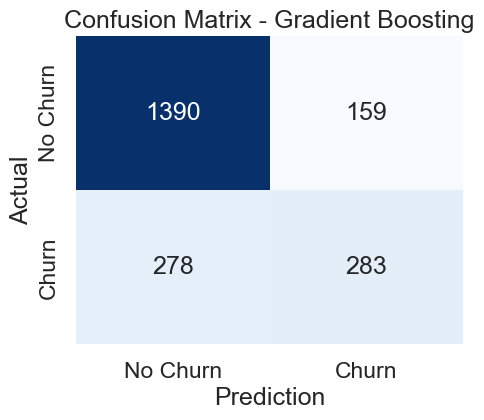

(0.7928909952606635,
 0.6402714932126696,
 0.5044563279857398,
 0.5643070787637089)

In [62]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
train_and_evaluate(gb, X_train_scaled, X_test_scaled, y_train, y_test, "Gradient Boosting")

## 7.8 Voting Classifier
Voting Classifier combines multiple base models. It can use **hard voting** (majority class) or **soft voting** (average probabilities), improving robustness.

### ===== Voting Classifier =====  
Accuracy: 0.7976  
Precision: 0.6718  
Recall: 0.467  
F1-Score: 0.551  
Classification Report:  
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1549
           1       0.67      0.47      0.55       561

    accuracy                           0.80      2110
   macro avg       0.75      0.69      0.71      2110
weighted avg       0.79      0.80      0.78      2110


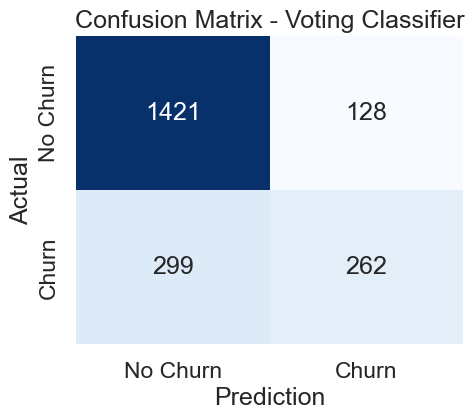

(0.7976303317535545,
 0.6717948717948717,
 0.46702317290552586,
 0.5509989484752892)

In [63]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[
    ('log_reg', log_reg),
    ('svm', svm),
    ('dt', dt),
    ('rf', rf),
    ('ada', ada),
    ('gb', gb)
], voting='hard')
train_and_evaluate(voting, X_train_scaled, X_test_scaled, y_train, y_test, "Voting Classifier")


## 7.9 Sampling and comparing data

In [64]:
from tabulate import tabulate
show_results()

### Model Results
| Modelo              |   Accuracy |   Precision |   Recall |   F1-Score |
|:--------------------|-----------:|------------:|---------:|-----------:|
| Logistic Regression |   0.807109 |    0.659091 | 0.568627 |   0.610526 |
| Gradient Boosting   |   0.792891 |    0.640271 | 0.504456 |   0.564307 |
| SVM                 |   0.794313 |    0.649412 | 0.491979 |   0.559838 |
| Voting Classifier   |   0.79763  |    0.671795 | 0.467023 |   0.550999 |
| Random Forest       |   0.785308 |    0.625    | 0.481283 |   0.543807 |
| AdaBoost            |   0.792891 |    0.662304 | 0.45098  |   0.536585 |
| KNN                 |   0.745972 |    0.522523 | 0.516934 |   0.519713 |
| Decision Tree       |   0.712322 |    0.461538 | 0.491979 |   0.476273 |

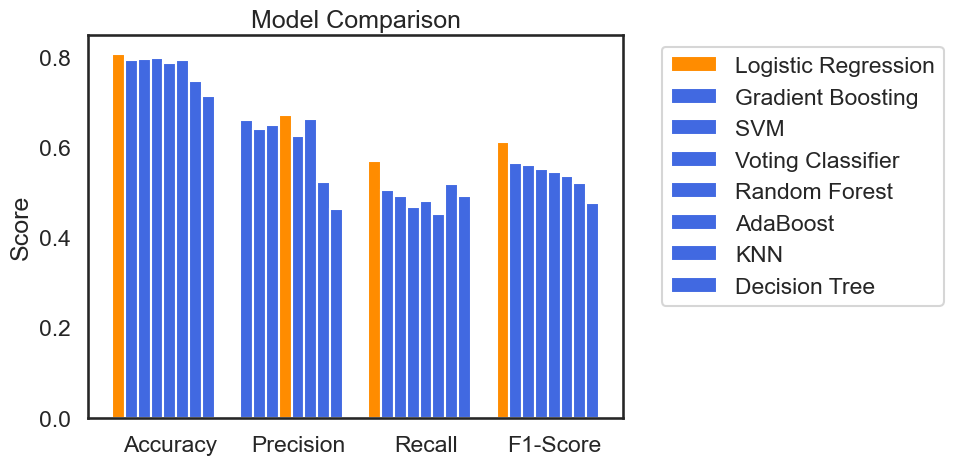

In [65]:
# Data
results = {
    "Modelo": [
        "Logistic Regression", "Gradient Boosting", "SVM",
        "Voting Classifier", "Random Forest", "AdaBoost",
        "KNN", "Decision Tree"
    ],
    "Accuracy": [0.807109, 0.792891, 0.794313, 0.79763, 0.785308, 0.792891, 0.745972, 0.712322],
    "Precision": [0.659091, 0.640271, 0.649412, 0.671795, 0.625, 0.662304, 0.522523, 0.461538],
    "Recall": [0.568627, 0.504456, 0.491979, 0.467023, 0.481283, 0.45098, 0.516934, 0.491979],
    "F1-Score": [0.610526, 0.564307, 0.559838, 0.550999, 0.543807, 0.536585, 0.519713, 0.476273]
}

df = pd.DataFrame(results)

# Search for indexes of the maximums
max_indices = {col: df[col].idxmax() for col in df.columns if col != "Modelo"}

# Plot
fig, ax = plt.subplots(figsize=(10,5))

metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
x = np.arange(len(metrics))
bar_width = 0.1

for i, model in enumerate(df["Modelo"]):
    vals = df.loc[i, metrics]
    colors = ["royalblue"] * len(metrics)
    # Color of the maximum values
    for j, m in enumerate(metrics):
        if i == max_indices[m]:
            colors[j] = "darkorange"
    ax.bar(x + i*bar_width, vals, width=bar_width, label=model, color=colors)

ax.set_xticks(x + bar_width*(len(df)/2))
ax.set_xticklabels(metrics)
ax.set_ylabel("Score")
ax.set_title("Model Comparison")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Conclusiones

1. **Most relevant model:**  
   **Logistic Regression** demonstrated the best overall performance in this scenario, providing consistent and interpretable results for churn prediction.

2. **Key metric:**  
   **recall** was identified as the most critical metric, as it **minimizes false negatives** and ensures the correct identification of the largest possible number of customers at risk.

3. **Strategic insights:**  
   Correlation and feature analysis enabled the company to **evaluate and prioritize concrete measures**, optimizing retention strategies around the most influential factors.

4. **Why Logistic Regression excelled:**  
   Based on these findings, the company is encouraged to **implement preventive and targeted actions**, enhancing responsiveness and long-term planning.

5. **General recommendation:**  
   he superior performance of Logistic Regression can be attributed to the nature of the dataset. Customer churn exhibits a relatively **linear relationship** with key features (such as contract type, tenure, and payment method). In addition, Logistic Regression is well-suited for **binary classification tasks**, offering robustness against overfitting compared to more complex models when the feature space is not highly non-linear. Its simplicity, interpretability, and ability to generalize effectively explain why it outperformed more sophisticated algorithms in this case.

## Final Summary

In summary, the analysis provided valuable insights into the factors influencing customer churn and allowed the development of predictive models to anticipate this behavior. Among the tested algorithms, **Logistic Regression emerged as the most effective model**, combining simplicity, interpretability, and robustness in handling binary classification tasks. Its ability to generalize well with the given dataset, where churn patterns are largely linearly separable, explains its superior performance compared to more complex approaches.

From a strategic perspective, the study highlights the importance of **recall** as the primary metric, ensuring that the largest possible number of customers at risk of leaving can be identified. These findings provide the company with actionable knowledge to design **targeted retention strategies**, strengthen long-term customer relationships, and improve overall business sustainability.